# Stock Market Prediction

Here, we will take a look at stock market prediction, using the decision tree and linear regression models.

# Importing Libraries

In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Using data from Apple's stock.
df = pd.read_csv('stocks2.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,08-02-2013,15.07,15.12,14.63,14.75,8407500,AAL
1,11-02-2013,14.89,15.01,14.26,14.46,8882000,AAL
2,12-02-2013,14.45,14.51,14.10,14.27,8126000,AAL
3,13-02-2013,14.30,14.94,14.25,14.66,10259500,AAL
4,14-02-2013,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    364 non-null    object 
 1   open    364 non-null    float64
 2   high    364 non-null    float64
 3   low     364 non-null    float64
 4   close   364 non-null    float64
 5   volume  364 non-null    int64  
 6   Name    364 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.0+ KB


In [5]:
df.describe()

,open,high,low,close,volume
count,364.000000,364.00000,364.000000,364.000000,3.640000e+02
mean,25.596291,26.02580,25.193307,25.633128,9.587899e+06
std,9.702431,9.85416,9.565598,9.746525,7.266367e+06
min,13.140000,13.42000,12.700000,13.020000,2.104100e+06
25%,17.010000,17.20000,16.820000,16.977500,5.398488e+06
50%,22.200000,22.62500,21.670000,22.045000,8.130749e+06
75%,36.000000,36.67000,35.327500,35.830000,1.138436e+07
max,44.300000,44.88000,43.910000,44.550000,7.859120e+07


In [6]:
df.shape

(364, 7)

# External Data Analysis

In [7]:
# Visualizing the opening prices of the data.
# plt.figure(figsize=(16,8))
# plt.title('Apple')
# plt.xlabel('Days')
# plt.ylabel('Opening Price USD ($)')
# plt.plot(df['open'])
# plt.show()

In [8]:
# Visualizing the high prices of the data.
# plt.figure(figsize=(16,8))
# plt.title('Apple')
# plt.xlabel('Days')
# plt.ylabel('High Price USD ($)')
# plt.plot(df['high'])
# plt.show()

In [9]:
# Visualizing the low prices of the data.
# plt.figure(figsize=(16,8))
# plt.title('Apple')
# plt.xlabel('Days')
# plt.ylabel('Low Price USD ($)')
# plt.plot(df['low'])
# plt.show()

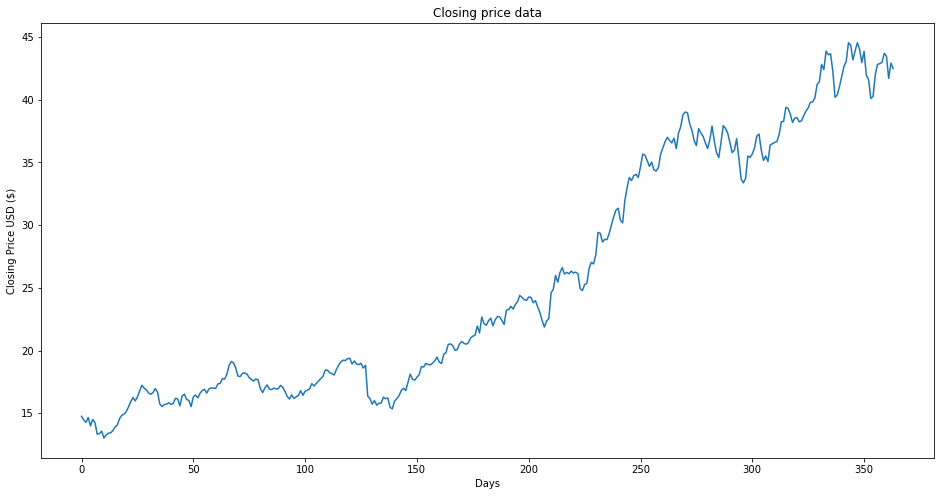

In [10]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Closing price data')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [11]:
df2 = df['close']

In [12]:
df2.tail()

359    43.7000
360    43.4800
361    41.6999
362    42.9199
363    42.4800
Name: close, dtype: float64

In [13]:
df2 = pd.DataFrame(df2)

In [14]:
df2.tail()

,close
359,43.7000
360,43.4800
361,41.6999
362,42.9199
363,42.4800


In [15]:
# Prediction 'x' days into the future.
future_days = 50
df2['Prediction'] = df2[['close']].shift(-future_days)

In [16]:
df2.tail()

,close,Prediction
359,43.7000,NaN
360,43.4800,NaN
361,41.6999,NaN
362,42.9199,NaN
363,42.4800,NaN


In [17]:
x = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(x)

[[14.75  ]
 [14.46  ]
 [14.27  ]
 [14.66  ]
 [13.99  ]
 [14.5   ]
 [14.26  ]
 [13.33  ]
 [13.37  ]
 [13.57  ]
 [13.02  ]
 [13.26  ]
 [13.41  ]
 [13.43  ]
 [13.61  ]
 [13.9   ]
 [14.05  ]
 [14.57  ]
 [14.82  ]
 [14.92  ]
 [15.13  ]
 [15.5   ]
 [15.91  ]
 [16.25  ]
 [15.98  ]
 [16.29  ]
 [16.78  ]
 [17.23  ]
 [17.    ]
 [16.86  ]
 [16.6   ]
 [16.51  ]
 [16.65  ]
 [16.97  ]
 [16.67  ]
 [15.74  ]
 [15.53  ]
 [15.69  ]
 [15.72  ]
 [15.84  ]
 [15.7   ]
 [15.78  ]
 [16.19  ]
 [16.14  ]
 [15.59  ]
 [16.37  ]
 [16.52  ]
 [16.1   ]
 [16.02  ]
 [15.52  ]
 [16.3   ]
 [16.45  ]
 [16.22  ]
 [16.59  ]
 [16.81  ]
 [16.9   ]
 [16.6   ]
 [16.94  ]
 [17.02  ]
 [17.    ]
 [16.98  ]
 [17.34  ]
 [17.38  ]
 [17.76  ]
 [17.72  ]
 [18.1   ]
 [18.81  ]
 [19.12  ]
 [19.01  ]
 [18.59  ]
 [17.95  ]
 [17.93  ]
 [18.19  ]
 [18.21  ]
 [18.12  ]
 [17.83  ]
 [17.67  ]
 [17.57  ]
 [17.73  ]
 [17.65  ]
 [16.95  ]
 [16.64  ]
 [17.02  ]
 [17.26  ]
 [16.92  ]
 [16.88  ]
 [17.01  ]
 [16.93  ]
 [16.95  ]
 [17.22  ]
 [17.06  ]

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11752\4086322951.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [18]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.3    16.45   16.22   16.59   16.81   16.9    16.6    16.94   17.02
 17.     16.98   17.34   17.38   17.76   17.72   18.1    18.81   19.12
 19.01   18.59   17.95   17.93   18.19   18.21   18.12   17.83   17.67
 17.57   17.73   17.65   16.95   16.64   17.02   17.26   16.92   16.88
 17.01   16.93   16.95   17.22   17.06   16.73   16.34   16.13   16.46
 16.17   16.31   16.42   16.8    16.43   16.75   16.84   16.94   17.36
 17.17   17.37   17.56   17.76   17.95   18.45   18.42   18.23   18.15
 18.05   18.5    18.83   19.09   19.23   19.2    19.35   19.38   18.92
 19.17   18.92   18.87   18.98   18.6    18.82   16.36   16.17   15.72
 16.01   15.64   15.8    15.81   16.27   16.16   16.21   15.47   15.34
 15.96   16.16   16.39   16.81   16.99   16.8    17.47   18.12   17.72
 17.63   17.87   18.07   18.72   18.68   18.97   18.89   18.86   18.99
 19.18   19.47   19.08   18.96   19.69   19.84   20.48   20.53   20.39
 20.02   20.06   20.5    20.72   20.58   20.5    20.62   21.     21.14
 21.22

# Linear and Decision Tree Regression

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [21]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [22]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11752\1876488320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[36.56  ],
       [36.93  ],
       [36.1   ],
       [37.34  ],
       [37.86  ],
       [38.81  ],
       [39.02  ],
       [38.96  ],
       [38.08  ],
       [37.5599],
       [36.74  ],
       [36.34  ],
       [37.7   ],
       [37.35  ],
       [37.08  ],
       [36.56  ],
       [36.11  ],
       [36.8   ],
       [37.9   ],
       [36.7   ],
       [35.77  ],
       [35.39  ],
       [36.6   ],
       [37.94  ],
       [37.71  ],
       [37.34  ],
       [36.56  ],
       [35.78  ],
       [35.98  ],
       [36.9   ],
       [35.29  ],
       [33.6799],
       [33.37  ],
       [33.72  ],
       [35.51  ],
       [35.4   ],
       [35.67  ],
       [36.16  ],
       [37.09  ],
       [37.26  ],
       [36.    ],
       [35.16  ],
       [35.51  ],
       [35.07  ],
       [36.39  ],
       [36.49  ],
       [36.6   ],
       [36.67  ],
       [37.22  ],
       [38.25  ]])

In [23]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[39.74   39.39   41.44   39.95   38.19   38.525  38.57   38.24   38.32
 38.72   39.11   39.35   39.8    39.82   40.16   39.74   41.44   42.82
 42.41   43.88   43.59   42.96   43.48   42.41   40.38   39.95   39.74
 42.66   43.06   44.55   44.36   43.179  43.179  44.55   42.82   42.96
 40.01   41.95   40.16   40.1    40.26   41.985  42.82   42.88   42.98
 43.7    43.48   36.67   42.9199 42.48  ]

[41.88241998 42.28652384 41.3800206  42.7343146  43.30224434 44.3398083
 44.56916454 44.50363418 43.54252231 42.97448335 42.07901105 41.64214202
 43.12749673 42.74523632 42.45034973 41.88241998 41.39094232 42.1445414
 43.34593124 42.03532415 41.01960364 40.60457806 41.92610689 43.38961815
 43.13841845 42.7343146  41.88241998 41.03052537 41.24895989 42.25375866
 40.4953608  38.73685373 38.39838944 38.78064985 40.73563877 40.61549979
 40.91038638 41.44555095 42.46127145 42.64694079 41.27080334 40.35337837
 40.73563877 40.25508283 41.69675064 41.8059679  41.92610689 42.00255897
 42.60325389 43.7281

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11752\189926940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


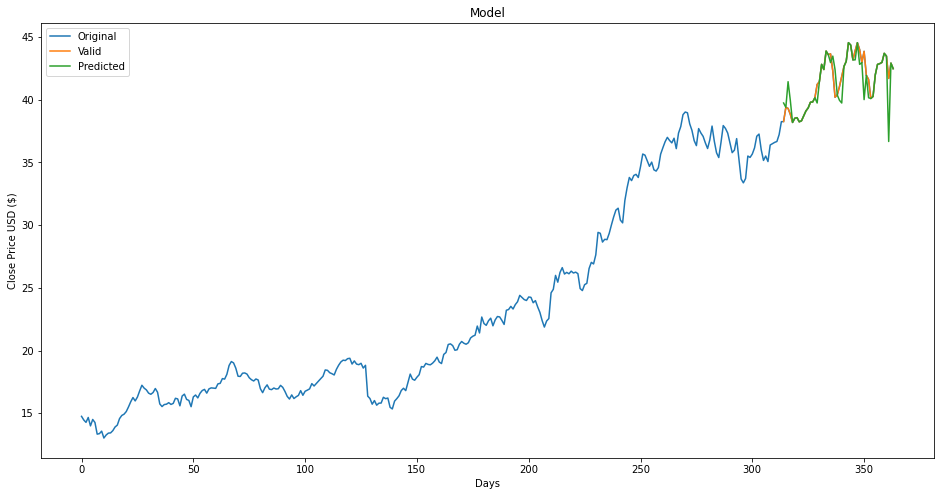

In [24]:
predictions = tree_prediction 
valid = df2[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(["Original","Valid","Predicted"])
plt.show()

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11752\3645520375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


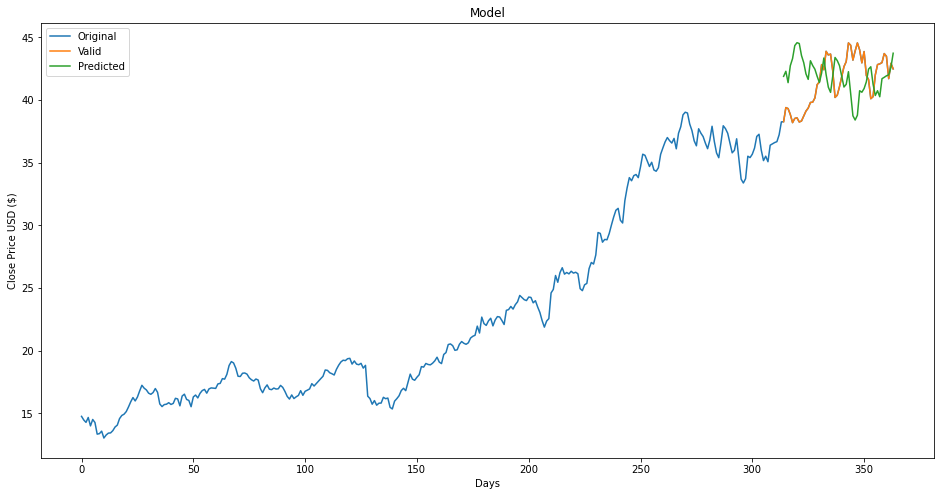

In [25]:
predictions = lr_prediction 
valid = df2[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(["Original","Valid","Predicted"])
plt.show()